The amplification factor in backward Lax-Wendroff is 
$$\epsilon(k,\sigma) = \left(1 + \frac{\sigma^2}{2} - \frac{3}{2}\sigma\right) - \left(\sigma^2 - 2 \sigma\right)e^{-\dot{\iota}kh} + \left(\frac{\sigma^2}{2} - \frac{\sigma}{2}\right)e^{-2\dot{\iota}kh} $$
We then put $-kh = \theta$ and define
$$\tilde{\epsilon}(\theta,\sigma) = \left(1 + \frac{\sigma^2}{2} - \frac{3}{2}\sigma\right) - \left(\sigma^2 - 2 \sigma\right)e^{\dot{\iota}\theta} + \left(\frac{\sigma^2}{2} - \frac{\sigma}{2}\right)e^{2\dot{\iota}\theta}$$
We'd then find $\sigma$ for which $$|\tilde{\epsilon}(\sigma,\theta)| \le 1, \quad \forall \theta \in [0,2\pi]$$

The amplifaction factor in central Lax-Wendroff is 

$$\gamma(k,\sigma) = \left(-\frac{\sigma}{2} +\frac{\sigma^2}{2}\right)e^{\dot{\iota}kh} + (1 -\sigma^2) + \left(\frac{\sigma}{2} + \frac{\sigma^2}{2} \right) e^{-\dot{\iota}kh}$$

Again, defining $$\tilde{\gamma}(\theta,\sigma) =\left(-\frac{\sigma}{2} +\frac{\sigma^2}{2}\right)e^{\dot{\iota}\theta} + (1 -\sigma^2) + \left(\frac{\sigma}{2} + \frac{\sigma^2}{2} \right) e^{-\dot{\iota}\theta}$$

We'd find $\sigma$ for which 
We'd then find $\sigma$ for which $$|\tilde{\gamma}(\sigma,\theta)| \le 1, \quad \forall \theta \in [0,2\pi]$$


In [108]:
import numpy as np
from numpy import exp,pi
import matplotlib.pyplot as plt

In [78]:
#Defining amplification factor functions for both schemes
def amp_back(theta,sigma):
  amp = (1.0 + sigma**2/2.0 - 1.5 * sigma) - (sigma**2 - 2.0*sigma)*exp(1.0j*theta) + (sigma**2/2.0 - sigma/2.0) * exp(2.0j*theta)
  return amp
def amp_cent(theta,sigma):
  amp = (-sigma/2.0 + sigma**2/2.0)*exp(1j*theta) + (1.0 - sigma**2) + (sigma/2.0 + sigma**2/2.0) * exp(-1j * theta)
  return amp    

In [99]:
theta_grid = np.linspace(0.0,2.0*np.pi, 100)
sigma_set = np.linspace(0.001,2.001,5)

In [100]:
for sigma in sigma_set:
    amplification = 0.0
    amplification_central = 0.0
    for theta in theta_grid:
        amplification = max(amplification,np.abs(amp_back(theta,sigma)))
        amplification_central = max(amplification_central,np.abs(amp_cent(theta,sigma)))
    print("Amplification factor in backward lw for sigma = ", sigma, " is ", amplification)
    print("Amplification factor in central lw for sigma = ", sigma, " is ", amplification_central)

Amplification factor in backward lw for sigma =  0.001  is  1.0
Amplification factor in central lw for sigma =  0.001  is  1.0
Amplification factor in backward lw for sigma =  0.501  is  0.9999999999999999
Amplification factor in central lw for sigma =  0.501  is  0.9999999999999999
Amplification factor in backward lw for sigma =  1.001  is  1.0
Amplification factor in central lw for sigma =  1.001  is  1.0039999894293137
Amplification factor in backward lw for sigma =  1.501  is  0.9999999999999996
Amplification factor in central lw for sigma =  1.501  is  3.505191245988973
Amplification factor in backward lw for sigma =  2.001  is  1.003999989429314
Amplification factor in central lw for sigma =  2.001  is  7.006273808633761


Thus, cfl for central Lax-Wendroff is 1.0, while for backward Lax-Wendroff it is 2.0

#Dissipation error comparison

Fixing a $\sigma$ for our scheme, $\gamma_k = \epsilon(k,\sigma)$, which we can compute in our code as 

```
amp(sigma,-kh)
```
For $U_j^n$ being the approximate solution. recall that $\gamma_k$ satisfies $U_j^n = \sum c_k e^{ikx_j} \implies U_j^{n+1} = \sum \gamma_k c_k e^{ikx_j}$. The solutions of our original PDE are of the form $u_j^n = \sum c_k e^{\dot{\iota}kx_j}(g_k)^n$ such that $|g_k| = 1$, i.e., they have no dissipation. Ideally, we we would also like this in our scheme.

So, we'd like $|\gamma_k|$ to be close to 1. The closer $\gamma_k$ is to $1$, the lesser dissipation our scheme shall have.

Thus, to check which scheme has lesser dispersion, we plot the two amplification factors. We'd be trying it for many choices of $\sigma$, so we isolate the plotting function

In [146]:
def scheme_compare(sigma):
  h = 0.1
  back = [] #Stores the amplification factors for backward lw
  cent = [] #Stores the amplification factors for central lw
  phase_angles = []
  for i in range(-30,30):
    i = float(i)
    phase_angles.append(i*h)
    back.append(np.abs(amp_back(-i*h,sigma)))
    cent.append(np.abs(amp_cent(-i*h,sigma)))
  plt.plot(phase_angles,cent, label = "Central Lax-Wendroff")
  plt.plot(phase_angles,back, label = "Backward Lax-Wendroff")
  plt.legend()
  plt.show()

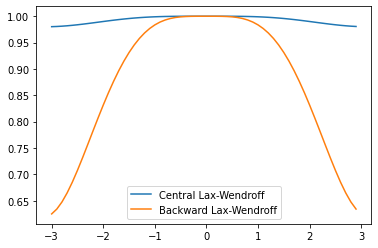

In [152]:
scheme_compare(0.1)

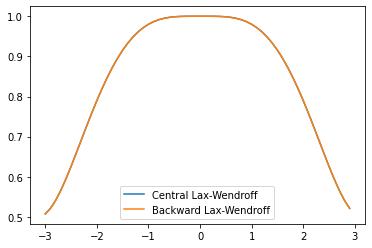

In [156]:
scheme_compare(0.5)

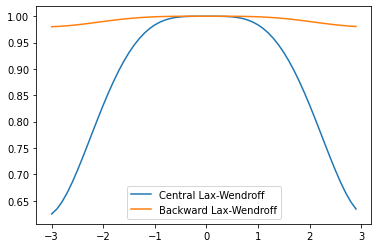

In [154]:
scheme_compare(0.9)

We observe that Central Lax-Wendroff wins for $\sigma < 0.5$, backward Lax-Wendroff wins for $\sigma > 0.5$. There's an exact draw for $\sigma = 0.5$

#**Dispersion**

$\newcommand{\Iota}{\dot{\imath}}$

If initial  $u_0(x) = \sum_k \alpha_k e^{\dot{\iota} k x}$, the exact solution is $$u(x_j,t^n) = \sum_{k \in \mathbb{Z}}c_k e^{\dot{\iota}kx_j}(g_k)^n$$
where $g_k = e^{-\Iota a k \Delta t}$. The approximate solution is $\sum c_k e^{\Iota k x_j}\alpha_k^n$. The dissipation error was about comparing absolute value of $g_k$ to that of $\alpha_k$, while dispersion is related to comparing arguments of $g_k, \alpha_k$. Defining $\phi_k = kh$ to be the phase angle of $k^\text{th}$ harmonic, we write $g_k = e^{-\Iota a \frac{\Delta t}{h} hk} = e^{-\Iota a \lambda \phi_k}$. <s>It is natural to say that $a$ is the speed of propogation of the $k^\text{th}$ harmonic if we remember that $g_k = e^{- a k \Delta t}$. Now notice that this speed is independent of $k$. We'd desire the same from our scheme. </s> We call $a$ to be the propogation speed, it quantifies how the solution **disperses**. Let's see the propogation speed of our numerical solution by writing the $k^\text{th}$ amplitude in the same form. Of course, we can write $\gamma_k$ as
$$\gamma_k = |\gamma_k| e^{-\Iota \omega_k \Delta t} $$
Thus, as 
$$\gamma_k = |\gamma_k| e^{-\Iota \frac{\omega_k}{k} \lambda \phi_k}$$
Thus, $\frac{\omega_k}{k}$ gives the propogation speed of $k^\text{th}$ harmonic of approximate solution. Thus, we define the dispersion error as 
$$\epsilon_d(k) = \frac{\omega_k}{ak} = \frac{\omega_k h}{a\phi_k} =:\epsilon_d(\phi_k, \text{CFL}), \quad -\pi \le \phi_k \le \pi$$

This quantity can also be computed as 
$$-\frac{\text{arg}(\gamma_k)}{a\lambda \phi_k} =-\frac{\text{arg}(\gamma_k)}{\sigma \phi_k} $$
And, we'd like it to be close to $1$

In [209]:
from numpy import angle
from numpy import abs

def back_dispersion_error(phase_angle,sigma):
  return abs(angle(amp_back(phase_angle,sigma)) / (sigma * phase_angle))
def cent_dispersion_error(phase_angle,sigma):
  return abs(angle(amp_cent(phase_angle,sigma)) / (sigma * phase_angle))

def dispersion_compare(sigma):
  h = 0.1
  back = [] #Stores the amplification factors for backward lw
  cent = [] #Stores the amplification factors for central lw
  phase_angles = []
  for i in range(-30,30):
    if i == 0:
      continue
    i = float(i)
    phase_angles.append(i*h)
    back.append(np.abs(back_dispersion_error(i*h,sigma)))
    cent.append(np.abs(cent_dispersion_error(i*h,sigma)))
  constant_one = np.ones(len(cent))
  plt.plot(phase_angles,constant_one)
  plt.plot(phase_angles,cent, label = "Central Lax-Wendroff")
  plt.plot(phase_angles,back, label = "Backward Lax-Wendroff")
  plt.legend()
  plt.show()

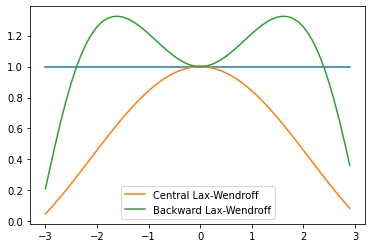

In [206]:
dispersion_compare(0.1)

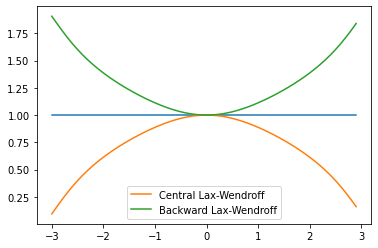

In [207]:
dispersion_compare(0.5)

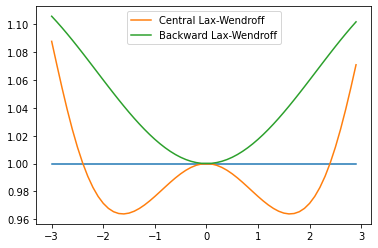

In [208]:
dispersion_compare(0.9)

It is interesting that the forward difference always stays above. From these, it is clear that there's a draw for $\sigma = 0.5$. Victory of backward Lax-Wendroff in some parts of $\sigma = 0.1$ and victory of central Lax-Wendroff for $\sigma = 0.9$ are quite clear. But, to get more clarity, we just plot their differences from $1$.

In [212]:
def dispersion_compare(sigma):
  h = 0.1
  back = [] #Stores the amplification factors for backward lw
  cent = [] #Stores the amplification factors for central lw
  phase_angles = []
  for i in range(-30,30):
    if i == 0:
      continue
    i = float(i)
    phase_angles.append(i*h)
    back.append(np.abs(1.0 - back_dispersion_error(i*h,sigma)))
    cent.append(np.abs(1.0 - cent_dispersion_error(i*h,sigma)))
  constant_one = np.ones(len(cent))
  plt.plot(phase_angles,cent, label = "Central Lax-Wendroff")
  plt.plot(phase_angles,back, label = "Backward Lax-Wendroff")
  plt.legend()
  plt.show()

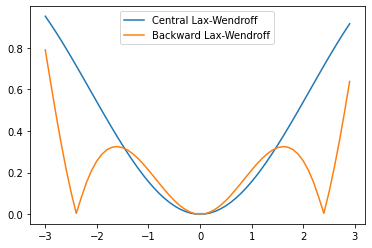

In [213]:
dispersion_compare(0.1)

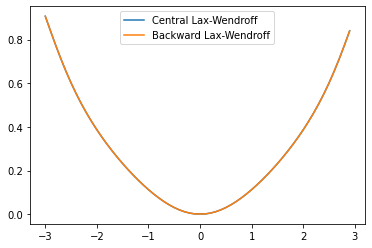

In [214]:
dispersion_compare(0.5)

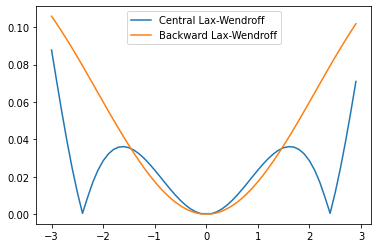

In [215]:
dispersion_compare(0.9)

Wow, we got the same results as we did for dissipation! Draw for $\sigma = 0.5$. Victory of backward for $\sigma < 0.5$ and of central for $\sigma > 0.5$